<h1>Engineering Assignment 7: DNA Sequencing</h1>

<h2>Section 1 (Groups 1, 2 and 3)</h2>

#### 1. Reading in the data
We are asked to define a function that can read a specified DNA sequence text file that takes in one parameter <i>text</i> that has the DNA sequence text file and eliminate acarriage returns, spaces, and other characters to create a list with just the sequence of characters corresponding to the DNA sequence.

We can do this by defining a function <i>read_DNA</i> that takes in one parameter <i>text</i> that corresponds to a text file of the DNA sequence.  We can open the file and iterate through each line, using .strip() to remove carriage returns and spaces at the margins of each line.  We can then join each line using line comprehension.

In [1]:
def read_DNA(text):
    output = []
    
    with open(text, 'r') as file:
        for line in file:
            line = line.strip()
            output.append(line)
    return ["".join(output)]

print(read_DNA('DNA_NM_1.txt'))

['ACTTCCGGAGACCTCACACAAGATGGCGGCACCCGAGGAACACGATTCTCCGACCGAAGCGTCCCAGCCGATTGTGGAAGAGGAGGAAACTAAAACATTTAAAGACCTGGGTGTGACAGATGTGTTGTGTGAAGCTTGTGACCAGTTGGGATGGACAAAACCCACCAAGATCCAGATTGAAGCTATTCCTTTGGCCTTACAAGGTCGTGATATCATTGGGCTTGCAGAAACTGGCTCTGGAAAGACAGGCGCCTTTGCTTTGCCCATTCTAAACGCACTGCTGGAGACCCCGCAGCGTTTGTTTGCCCTAGTTCTTACCCCGACTCGGGAGCTGGCCTTTCAGATCTCAGAGCAGTTTGAAGCCCTGGGGTCCTCTATTGGAGTGCAGAGTGCTGTGATTGTAGGTGGAATTGATTCAATGTCTCAATCTTTGGCCCTTGCAAAAAAACCACATATAATAATAGCAACTCCTGGTCGACTGATTGACCACTTGGAAAATACGAAAGGTTTCAACTTGAGAGCTCTCAAATACTTGGTCATGGATGAAGCCGACCGAATACTGAATATGGATTTTGAGACAGAGGTTGACAAGATCCTCAAAGTGATTCCTCGAGATCGGAAAACATTCCTCTTCTCTGCCACCATGACCAAGAAGGTTCAAAAACTTCAGCGAGCAGCTCTGAAGAATCCTGTGAAATGTGCCGTTTCCTCTAAATACCAGACAGTTGAAAAATTACAGCAATATTATATTTTTATTCCCTCTAAATTCAAGAGTAAGCGCCTAGGATCCCTTAATAAGTTTAAGGCCAAGGCCCGTTCCATTCTTCTAGCAACTGACGTTGCCAGCCGAGGTTTGGACATACCTCATGTAGATGTGGTTGTCAACTTTGACATTCCTACCCATTCCAAGGATTACATCCATCGAGTAGGTCGAACAGCTAGAGCTGGGCGCTCCGGAAAGGCTATTACTTTTGTCACACAGTATGATGTGGAACTCT

#### 2. Reading in the translation table
We are asked to read a text file that stores all the key-value pairs to transcribe a sequence of three characters (codons) into the corresponding amino acid.

We can do this by defining a function <i>translation</i> that takes in one parameter <i>text</i> which has the key-value pairs.  From here, after initializing the dictionary, we can open the file and iterate through each line.  For each line, we can strip all parts and replace unneeded characters until all we're left with is the DNA sequence, a colon, and the corresponding amino acid.  For each of these key-value pairs, we can create a small list where we can then filter into a dictionary, in which index 0 corresponds to the DNA sequence and index 1 is the amino acid.

In [2]:
def translation(text):
    dictionary = {}
    with open(text) as file:
        for line in file:
            line = line.strip().rstrip(",").replace("'","").replace(" ","").split(",")
            for elem in line:
                entry = elem.split(":")
                dictionary[entry[0]] = entry[1]
    return dictionary

print(translation('DNA_Amino_Acid_Translation_Matrix.txt'))

{'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M', 'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T', 'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K', 'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L', 'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P', 'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q', 'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R', 'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V', 'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A', 'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E', 'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G', 'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S', 'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L', 'TAC': 'Y', 'TAT': 'Y', 'TAA': '_', 'TAG': '_', 'TGC': 'C', 'TGT': 'C', 'TGA': '_', 'TGG': 'W'}


#### 3. Create the Amino Acid Sequence from the DNA sequence

We are asked to define a function that uses the DNA sequence list and the translation dictionary to create the amino acid sequence, given a start and stop base numbers.  We are then asked to do a test case 'DNA_NM_1.txt'.

We can do this by first defining the codon length and translation dictionary.
We can then define a function <i>create_sequence</i> that takes in three parameters: the sequence as a text file, the starting index, and an optional stopping index.  If no stopping index is provided, we can initialize it as the full length of the sequence.
We can then open and read the file and splice it to the wanted length according to the indices.  From here we can generate a list of the codon sequences using list comprehension based on groups of 3.
From here, we can search the dictionary and append the corresponding amino acid for each codon in the list, and return a string file of the protein.

In [154]:
codon_len = 3
dictionary = translation('DNA_Amino_Acid_Translation_Matrix.txt')

def create_sequence(sequence, start, stop=None):
    result = []
    
    if stop == None:
        stop = len(sequence)
    
    with open(sequence, 'r') as file:
        sequence = read_DNA(sequence)[0]
        sequence = sequence[start-1:stop]
        codons = [sequence[i:i+codon_len] for i in range(0, len(sequence), codon_len)]
        for codon in codons:
            if codon in dictionary:
                  result.append(dictionary[codon])
            else:
                 pass
        return "".join(result)
        
print(create_sequence('DNA_NM_1.txt', 1, 1243))

TSGDLTQDGGTRGTRFSDRSVPADCGRGGN_NI_RPGCDRCVV_SL_PVGMDKTHQDPD_SYSFGLTRS_YHWACRNWLWKDRRLCFAHSKRTAGDPAAFVCPSSYPDSGAGLSDLRAV_SPGVLYWSAECCDCRWN_FNVSIFGPCKKTTYNNSNSWSTD_PLGKYERFQLESSQILGHG_SRPNTEYGF_DRG_QDPQSDSSRSENIPLLCHHDQEGSKTSASSSEESCEMCRFL_IPDS_KITAILYFYSL_IQE_APRIP__V_GQGPFHSSSN_RCQPRFGHTSCRCGCQL_HSYPFQGLHPSSRSNS_SWALRKGYYFCHTV_CGTLPAHRTLNWEETTRFSNTG__GYDADRTRR_SPKVCPNGVKGAWRKEETLARGCWR___HRGCYWCQEQGGWRKNEEAERPL


#### 4. Create the Official Amino Acid Sequence

We are asked to define a function that reads an amino acid sequence file and simply returns it as a list of each amino acid.  We are then asked to do a test case with 'Protein_1_23_1243.txt'.

We can do this by defining a function <i>read_protein</i> that takes in a parameter, the text.  Depending on whether the input is a file or a string, we can append each character in the file or string unto the list and return it.

In [37]:
def read_protein(text):
    result = []
    
    try:
        with open(text, 'r') as file:
            for line in file:
                for char in line.strip():
                    result.append(char)
    except:
        for char in text:
            result.append(char)

    return result

print(read_protein('Protein_1_23_1243.txt'))

['M', 'A', 'A', 'P', 'E', 'E', 'H', 'D', 'S', 'P', 'T', 'E', 'A', 'S', 'Q', 'P', 'I', 'V', 'E', 'E', 'E', 'E', 'T', 'K', 'T', 'F', 'K', 'D', 'L', 'G', 'V', 'T', 'D', 'V', 'L', 'C', 'E', 'A', 'C', 'D', 'Q', 'L', 'G', 'W', 'T', 'K', 'P', 'T', 'K', 'I', 'Q', 'I', 'E', 'A', 'I', 'P', 'L', 'A', 'L', 'Q', 'G', 'R', 'D', 'I', 'I', 'G', 'L', 'A', 'E', 'T', 'G', 'S', 'G', 'K', 'T', 'G', 'A', 'F', 'A', 'L', 'P', 'I', 'L', 'N', 'A', 'L', 'L', 'E', 'T', 'P', 'Q', 'R', 'L', 'F', 'A', 'L', 'V', 'L', 'T', 'P', 'T', 'R', 'E', 'L', 'A', 'F', 'Q', 'I', 'S', 'E', 'Q', 'F', 'E', 'A', 'L', 'G', 'S', 'S', 'I', 'G', 'V', 'Q', 'S', 'A', 'V', 'I', 'V', 'G', 'G', 'I', 'D', 'S', 'M', 'S', 'Q', 'S', 'L', 'A', 'L', 'A', 'K', 'K', 'P', 'H', 'I', 'I', 'I', 'A', 'T', 'P', 'G', 'R', 'L', 'I', 'D', 'H', 'L', 'E', 'N', 'T', 'K', 'G', 'F', 'N', 'L', 'R', 'A', 'L', 'K', 'Y', 'L', 'V', 'M', 'D', 'E', 'A', 'D', 'R', 'I', 'L', 'N', 'M', 'D', 'F', 'E', 'T', 'E', 'V', 'D', 'K', 'I', 'L', 'K', 'V', 'I', 'P', 'R', 'D', 'R', 'K',

#### 5. Compare two Amino Acid Sequences

We are asked to define a function that compares two amino acid sequences and returns a boolean value on whether the two sequences are equal or not.  We are then asked to do a test case with a DNA sequence file and its correspodning protein file.

We can do this by defining a function <i>compare_sequence</i> that takes in two parameters for the two sequences.  We can then return a boolean value depending on whether these two parameters are equal.

When running the test case, we must convert the DNA sequence into a protein sequence first before standardizing as a protein file.

In [58]:
def compare_sequences(first_sequence, second_sequence):
    if first_sequence == second_sequence:
        return True
    else:
        return False

sequence_1 = read_protein(create_sequence('DNA_NM_1.txt', 23, 1243))
sequence_2 = read_protein('Protein_1_23_1243.txt')

print(compare_sequences(sequence_1, sequence_2))

True


#### 6. Repeat for the other test DNA sequences

We are asked to compare two more DNA sequences and their protein files.

We can do this by performing the same last step as the previous task.

In [59]:
# sequence 2, protein 2
sequence2_1 = read_protein(create_sequence('DNA_NM_2.txt', 36, 1904))
sequence2_2 = read_protein('Protein_2_36_1904.txt')
print(compare_sequences(sequence2_1, sequence2_2))

# sequence 3, protein 3
sequence3_1 = read_protein(create_sequence('DNA_NM_3.txt', 200, 1570))
sequence3_2 = read_protein('Protein_3_200_1570.txt')
print(compare_sequences(sequence3_1, sequence3_2))

True
True


<h2>Section 2 (Groups 2 and 3)</h2>

#### 1. Identifying mutations
We are asked to define a function that, given a DNA sequence and its mutated counterpart, returns a dictionary with the indices of where mutations occured as keys and descriptions of the mutations as the values.  We are asked to do test cases.

We can do this by defining a function <i>identify_mutation</i> that takes in two parameters: one for the original DNA sequence and one for its mutated counterpart.  After initializing the dictionary, we can open and clean the files.  From here we can iterate through an enumerated tuple of each line for both the original and mutated, and iterate again for each character and compare whether or not they are equal.  If these characters are not equal, we can store the description based on these mismatched characters and then store it based on the index stored from the enumerate() function.

In [155]:
def identify_mutation(original, mutated):
    mutations = {}
    with open(original, 'r') as original, open(mutated, 'r') as mutated:
        original = [line.strip() for line in original]
        mutated = [line.strip() for line in mutated]
        
        for index, (original_sequence, mutated_sequence) in enumerate(zip(original, mutated)):
            for original, mutated in zip(original_sequence, mutated_sequence):
                if original != mutated:
                    mutation_description = f"{mutated} instead of {original}"
                    mutations[index + 1] = mutation_description
    print(mutations)
                

identify_mutation('DNA_NM_1.txt', 'DNA_NM_1_mutated.txt')
identify_mutation('DNA_NM_2.txt', 'DNA_NM_2_mutated.txt')
identify_mutation('DNA_NM_3.txt', 'DNA_NM_3_mutated.txt')

mutated_1 = create_sequence('DNA_NM_1_mutated.txt', 1)
mutated_2 = create_sequence('DNA_NM_2_mutated.txt', 1)
mutated_3 = create_sequence('DNA_NM_3_mutated.txt', 1)

{2: 'G instead of A', 7: 'T instead of C', 13: 'A instead of C'}
{6: 'T instead of A', 10: 'T instead of A', 14: 'T instead of A'}
{7: 'G instead of A', 9: 'C instead of T', 21: 'C instead of A', 22: 'T instead of C', 28: 'C instead of T'}


<h2>Section 3 (Group 3)</h2>

### Pandas analysis
We are given a csv file that contains fractions of each of the 64 codons for over 13,000 species, obtained from Kaggle.com.  We are asked to use Pandas to complete the following tasks:

1\) Describe the overall dimensions of the dataset.  How many rows and columns are there?<p>
2\) Display the weights for the codons CUU, CUC, CUA and CUG for the first five species<p>
3\) Filter the dataset to include just those species containing "Tomato"<p>
4\) Find the species that has the largest weight of AUA.<p>
5\) Filter the dataset to include only those species with a GUC weight larger than .06<p>
6\) For the species with GUC larger than .06, plot the UUU weight as the y-axis and the UUC weight as the x-axis.<p>
7\) On the same plot, plot the UUU and UUC weights for the species with no GUC<p>
    
After importing pandas, we can do the following:
1\) We can read the csv file with pandas to turn it into a DataFrame.  We can then use .shape to describe the dimensions.
2\) We can list out the first five elements of each codon by iterating through each codon and simple indexing.
3\) We can index according to "SpeciesName" and whether or not the string contains "Tomato."
4\) We can index the species according to its name and the column index that has the max value for "AUA" using .apply() to apply a short lambda function (max function).
5\) We can index values that have a "GUC" greater than 0.06.
6\) We can plot according to the previous index using .plot() assuming that scatter is the best option, and initializing the x and y axes.
7\) We can plot according to the previous guidelines but instead index based on whether "GUC" is equal to 0 (none).

Dimensions:(13026, 69)
0    0.01203
1    0.00407
2    0.00782
3    0.01567
4    0.01380
Name: CUU, dtype: float64
0    0.03208
1    0.02849
2    0.01111
3    0.01358
4    0.00548
Name: CUC, dtype: float64
0    0.00100
1    0.00204
2    0.01028
3    0.00940
4    0.00473
Name: CUA, dtype: float64
0    0.04010
1    0.04410
2    0.01193
3    0.01723
4    0.02076
Name: CUG, dtype: float64
     Kingdom  DNAtype  SpeciesID  Ncodons  \
456      vrl        0      12281     4478   
470      vrl        0      12315    12338   
480      vrl        0     123735     3424   
522      vrl        0      12851     2261   
565      vrl        0     138314    17982   
...      ...      ...        ...      ...   
2695     vrl        0      71186     2817   
2791     vrl        0      85752    11883   
2811     vrl        0      92963     3923   
2826     vrl        0      96054     1104   
5420     bct        0     434404     1737   

                                 SpeciesName      UUU      UUC      UUA 

<AxesSubplot:xlabel='UUC', ylabel='UUU'>

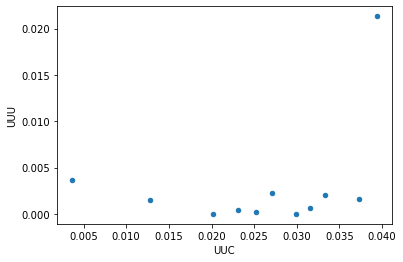

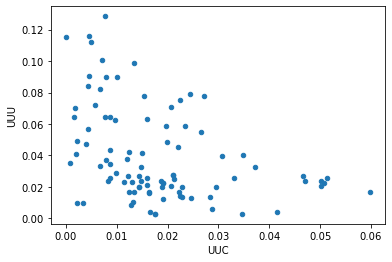

In [104]:
import pandas as pd

# Task 1
df = pd.read_csv('codon_usage.csv')
print(f"Dimensions:{df.shape}")

# Task 2
specific_codons = ['CUU', 'CUC', 'CUA', 'CUG']
for codon in specific_codons:
    print(df[codon][0:5])

# Task 3
filtered_df_tomato = df[df['SpeciesName'].str.contains('Tomato')]
print(filtered_df_tomato)

# Task 4
max_aua = df["SpeciesName"][df.index[df.apply(lambda row: df["AUA"].max() in row.values, axis=1)].tolist()]
print(max_aua)

# Task 5
filtered_df = df[df['GUC'] > 0.06]
print(filtered_df)

# Task 6
df[df['GUC'] > 0.06].plot(x='UUC', y='UUU', kind='scatter')

# Task 7
df[df['GUC'] == 0].plot(x='UUC', y='UUU', kind='scatter')

